# Notebook for Quickly Recreating Publication Plots
----

CPD DM Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import rc

rc('text', usetex=True)
rc('font', family="serif")
rc('axes', labelsize=12)
rc('font', size=12)
rc('legend', fontsize=10)
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)

## Plotting Figure 1

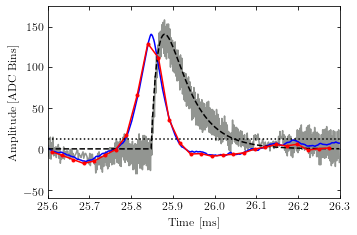

In [2]:
fig, ax = plt.subplots(figsize=(1.5 * (3 + 3/8), 3 + 3/8))

rawpulse = np.loadtxt('figure1/rawpulse.txt', delimiter=',')
optimumfilter = np.loadtxt('figure1/optimumfilter.txt', delimiter=',')
fitresult = np.loadtxt('figure1/fitresult.txt', delimiter=',')
fpgafilter = np.loadtxt('figure1/fpgafilter.txt', delimiter=',')

ax.plot(
    rawpulse[:, 0] * 1e3,
    rawpulse[:, 1],
    label="Raw Pulse",
    color='xkcd:grey',
)

ax.plot(
    optimumfilter[:, 0] * 1e3,
    optimumfilter[:, 1],
    label="Optimum Filter",
    color='blue',
    linestyle='-',
)

ax.plot(
    fitresult[:, 0] * 1e3,
    fitresult[:, 1],
    label="Fit Result",
    color='k',
    linestyle='dashed',
)

ax.plot(
    fpgafilter[:, 0] * 1e3,
    fpgafilter[:, 1],
    label='FPGA Filter',
    color='red',
    marker='.',
)

ax.axhline(11.77, color='k', linestyle='dotted', label='Threshold')

ax.set_xlim(
    25.6,
    26.3,
)

ax.set_ylim(-60, 175)

ax.tick_params(which="both", direction="in", right=True, top=True)
ax.set_ylabel("Amplitude [ADC Bins]", fontsize=12)
ax.set_xlabel("Time [ms]", fontsize=12)

fig.tight_layout()



## Plotting Figure 2

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel/__main__.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


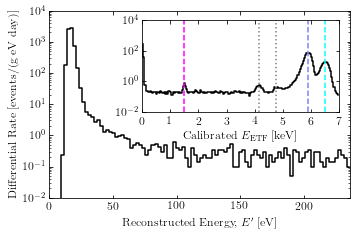

In [3]:
fig, ax = plt.subplots(figsize=(1.5 * (3 + 3/8), 3 + 3/8))

ax.step(*np.loadtxt('figure2/recon_energy_drde.txt', delimiter=',', unpack=True), where='mid', linestyle='-', color='k')

left, bottom, width, height = [0.4, 0.52, 0.54, 0.38]
ax2 = fig.add_axes([left, bottom, width, height])


ax2.step(*np.loadtxt('figure2/e_etf_drde.txt', delimiter=',', unpack=True), where='mid', linestyle='-', color='k')


colors = plt.get_cmap("cool_r")(np.array([0, 0.5, 1]))


ax2.axvline(
    1.5,
    linestyle ='--',
    color=colors[0],
)

ax2.axvline(
    5.9,
    linestyle ='--',
    color=colors[1],
)


ax2.axvline(
    6.5,
    linestyle ='--',
    color=colors[2],
)

ax2.axvline(
    (6.5 - 1.739),
    linestyle ='dotted',
    color='grey',
)
ax2.axvline(
    (5.9 - 1.739),
    linestyle = 'dotted',
    color='grey',
)
ax2.grid(b=False, which='both')

ax2.set_title('')

ax2.set_ylim(1e-2, 1e4)
ax2.set_xlim(0, 7)
ax2.set_yscale('log')
ax2.tick_params(which="both", direction="in", top=True, right=True, labelsize=12)

ax2.set_ylabel('')
ax2.set_xlabel(r"Calibrated $E_\mathrm{ETF}$ [keV]", fontsize=12)

ax2.set_yticks(ticks=np.geomspace(1e-2, 1e4, num=4))
ax2.set_xticks(ticks=np.linspace(0, 7, num=8))
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(b=False, which='both')


ax.set_ylabel(r"$\partial R / \partial E'$ [events/($\mathrm{g}\ \mathrm{eV}\ \mathrm{day}$)]", fontsize=12)
ax.set_ylabel(r"Differential Rate [events/($\mathrm{g}\ \mathrm{eV}\ \mathrm{day}$)]", fontsize=12)
ax.set_xlabel("Reconstructed Energy, $E'$ [eV]", fontsize=12)

ax.set_title('')
ax.set_yscale('log')
ax.set_ylim(1e-2, 1e4)
ax.set_xlim(0, 236.25)

fig.tight_layout()



## Plotting Figure 3

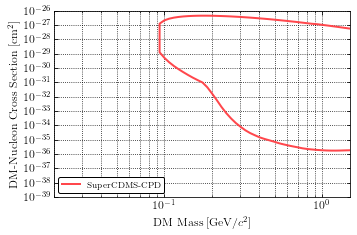

In [4]:

fig, ax = plt.subplots(figsize=(3 + 3/8) * np.array([1.5, 1]))

linewidth = 2

cpd_lim = np.loadtxt('figure3/cpd_limit.txt', delimiter=',')

ax.loglog(
    cpd_lim[:, 0],
    cpd_lim[:, 1],
    color='xkcd:light red',
    linestyle='-',
    linewidth=linewidth,
    label="SuperCDMS-CPD"
)


ax.tick_params(which="both", direction="in", top=True, right=True, labelsize=12)

ax.grid(which="both", linestyle="dotted", color='k')
ax.set_xlim(0.02, 1.5)
ax.set_ylim(1e-39, 1e-26)

plt.yticks(ticks=np.geomspace(1e-39, 1e-26, num=39 - 26 + 1))

lgd = ax.legend(loc="lower left", fontsize=9, framealpha=1, edgecolor='k', ncol=1)
ax.set_ylabel(r"DM-Nucleon Cross Section [cm$^2$]", fontsize=12)
ax.set_xlabel(r"DM Mass [GeV/$c^2$]", fontsize=12)


fig.tight_layout()

## dRdE Plot

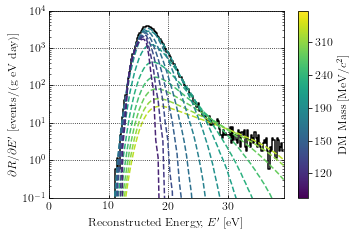

In [5]:

fig, ax = plt.subplots(figsize=(3 + 3/8) * np.array([1.5, 1]))

ax.step(*np.loadtxt('figure4/recon_energies_low_drde.txt', delimiter=',', unpack=True), where='mid', linestyle='-', color='k')

drde_files = sorted(glob('figure4/oi*'))
colors = plt.get_cmap('viridis')(np.linspace(0.1, 0.9, num=len(drde_files)))

for f, c in zip(drde_files, colors):
    en, drde = np.loadtxt(f, delimiter=',', unpack=True)
    ax.plot(en, drde, linestyle='dashed', color=c)

ax.set_ylim(1e-1, 1e4)
masses = [float(s.split('_')[3]) for s in sorted(glob('figure4/oi_drde_mass_*'))]

mappable = ScalarMappable(
    norm=Normalize(
        vmin=np.log(masses[0]),
        vmax=np.log(400),
    ),
    cmap=plt.get_cmap("viridis"),
)
mappable.set_array(masses)

cb = fig.colorbar(mappable, ax=ax)
ticks = cb.get_ticks()
cb.set_ticks(ticks)
cb.set_ticklabels(np.around(np.exp(ticks), decimals=-1).astype('int'))
cb.set_label(r"DM Mass [MeV/$c^2$]", fontsize=12)

ax.grid(b=False, which='minor')
ax.grid(which='major', color='k', linestyle='dotted')


ax.set_xlim(0, 0.039376 * 1e3)

ax.set_title('')

ax.set_ylabel(r"$\partial R / \partial E'$ [events/($\mathrm{g}\ \mathrm{eV}\ \mathrm{day}$)]")
ax.set_xlabel(r"Reconstructed Energy, $E'$ [eV]")
ax.set_yscale('log')
ax.tick_params(which="both", direction="in", right=True, top=True)

for ii, l in enumerate(ax.get_lines()):
    if l.get_linestyle() == '--':
        l.set_zorder(len(ax.get_lines()) - ii)
    else:
        l.set_zorder(0)
fig.tight_layout()
